In [57]:
import pandas as pd
import requests

In [58]:
yahoo_url = "https://finance.yahoo.com/quote/AAPL/history?p=AAPL"

In [59]:
df = pd.read_html(requests.get(yahoo_url,headers={'User-agent':'Chrome/'}).text,header=0)
# df = pd.read_html(requests.get(yahoo_url,headers={'User-agent':'Mozilla/5.0'}).text,header=0)

In [60]:
df = df[0]
# df[0].tail(2)

In [61]:
df["Adj Close**"] = pd.to_numeric(df["Adj Close**"],errors="coerce")

In [62]:
df=df.dropna()

In [63]:
df.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
94,"Feb 15, 2023",153.11,155.50,152.88,155.33,155.12,65573800
95,"Feb 14, 2023",152.12,153.77,150.86,153.20,152.99,61707600
96,"Feb 13, 2023",150.95,154.26,150.92,153.85,153.64,62199000
97,"Feb 10, 2023",149.46,151.34,149.22,151.01,150.80,57450700
99,"Feb 09, 2023",153.78,154.33,150.42,150.87,150.43,56007100


In [64]:
from datetime import datetime

In [70]:
df["Date2"] = [datetime.strptime(i,"%b %d, %Y") for i in df["Date"]]

In [71]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Date2
0,"Jun 30, 2023",191.63,194.48,191.26,193.97,193.97,85069600,2023-06-30
1,"Jun 29, 2023",189.08,190.07,188.94,189.59,189.59,46347300,2023-06-29
2,"Jun 28, 2023",187.93,189.90,187.60,189.25,189.25,51216800,2023-06-28
3,"Jun 27, 2023",185.89,188.39,185.67,188.06,188.06,50730800,2023-06-27
4,"Jun 26, 2023",186.83,188.05,185.23,185.27,185.27,48088700,2023-06-26


In [72]:
df = df.set_index("Date2")

In [74]:
df["Adj Close**"]

Date2
2023-06-30    193.97
2023-06-29    189.59
2023-06-28    189.25
2023-06-27    188.06
2023-06-26    185.27
               ...  
2023-02-15    155.12
2023-02-14    152.99
2023-02-13    153.64
2023-02-10    150.80
2023-02-09    150.43
Name: Adj Close**, Length: 98, dtype: float64

In [75]:
df["Adj Close**"].dtype

dtype('float64')

In [76]:
import matplotlib.pyplot as plt

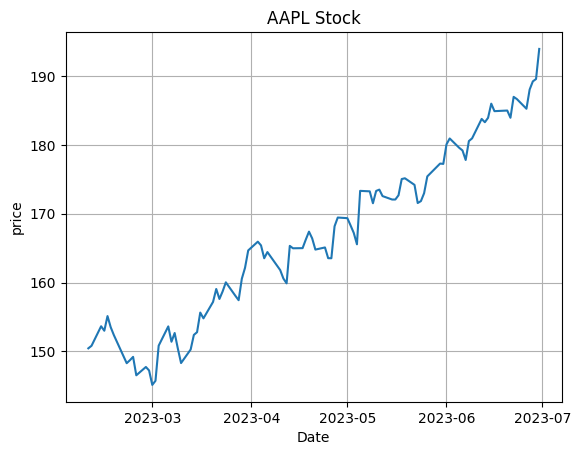

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df["Adj Close**"])
ax.grid(True)
ax.set(
    title="AAPL Stock",
    xlabel="Date",
    ylabel="price",
)
plt.show()

In [86]:
df.to_csv("AAPL_PRICE.csv")